In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ASSIGNMENT-5

In [2]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns

(x_train,y_train),(x_test,y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 2s 0us/step


In [3]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [4]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

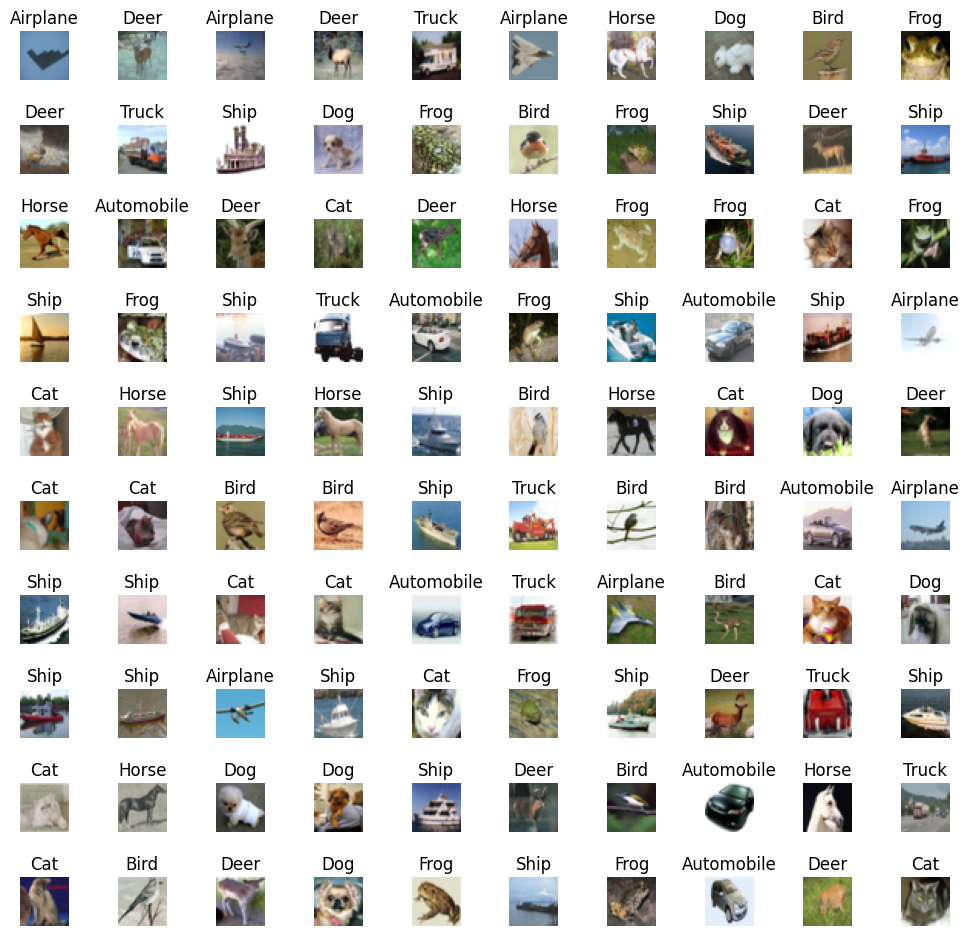

In [5]:
r = 10
c = 10
showImages(r,c,X =x_train,Y = y_train)

In [6]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

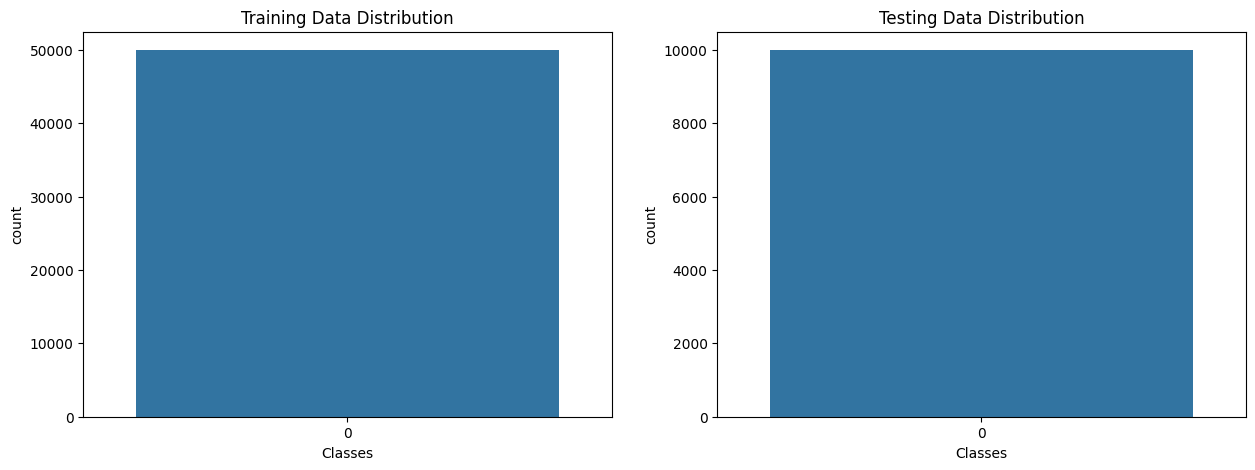

In [7]:
fig,axs = pyplot.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training Data Distribution')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing Data Distribution')
axs[1].set_xlabel('Classes')
pyplot.show()

In [8]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

**ASSIGNMENT -6**

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [12]:
data = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')

texts = data['Consumer complaint narrative'].astype(str)
labels = data['Product']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [13]:
vocab_size = 10000


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')


In [15]:
label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))


Epoch 1/10
2/2 [==============================] - 2s 385ms/step - loss: 1.7323 - accuracy: 0.0375 - val_loss: 1.3598 - val_accuracy: 0.7619
Epoch 2/10
2/2 [==============================] - 0s 104ms/step - loss: 1.3281 - accuracy: 0.8000 - val_loss: 1.1109 - val_accuracy: 0.7619
Epoch 3/10
2/2 [==============================] - 0s 115ms/step - loss: 1.0821 - accuracy: 0.8000 - val_loss: 0.9798 - val_accuracy: 0.7619
Epoch 4/10
2/2 [==============================] - 0s 212ms/step - loss: 0.9364 - accuracy: 0.8000 - val_loss: 0.9619 - val_accuracy: 0.7619
Epoch 5/10
2/2 [==============================] - 0s 227ms/step - loss: 0.8754 - accuracy: 0.8000 - val_loss: 0.9838 - val_accuracy: 0.7619
Epoch 6/10
2/2 [==============================] - 0s 212ms/step - loss: 0.8467 - accuracy: 0.8000 - val_loss: 1.0163 - val_accuracy: 0.7619
Epoch 7/10
2/2 [==============================] - 0s 227ms/step - loss: 0.8303 - accuracy: 0.8000 - val_loss: 1.0519 - val_accuracy: 0.7619
Epoch 8/10
2/2 [====

In [19]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 54ms/step - loss: 1.1439 - accuracy: 0.7619
Test accuracy: 0.761904776096344


**ASSIGNMENT -7**

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [22]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')


X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')


In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))


Epoch 1/10
57/57 [==============================] - 12s 185ms/step - loss: 1.3983 - accuracy: 0.2895 - val_loss: 1.3883 - val_accuracy: 0.3084
Epoch 2/10
57/57 [==============================] - 7s 123ms/step - loss: 1.4025 - accuracy: 0.2768 - val_loss: 1.3905 - val_accuracy: 0.3024
Epoch 3/10
57/57 [==============================] - 8s 143ms/step - loss: 1.4067 - accuracy: 0.2901 - val_loss: 1.4062 - val_accuracy: 0.2498
Epoch 4/10
57/57 [==============================] - 11s 192ms/step - loss: 1.3995 - accuracy: 0.2840 - val_loss: 1.3883 - val_accuracy: 0.3100
Epoch 5/10
57/57 [==============================] - 7s 123ms/step - loss: 1.3971 - accuracy: 0.2845 - val_loss: 1.3887 - val_accuracy: 0.2763
Epoch 6/10
57/57 [==============================] - 9s 162ms/step - loss: 1.3986 - accuracy: 0.2834 - val_loss: 1.3873 - val_accuracy: 0.2728
Epoch 7/10
57/57 [==============================] - 8s 134ms/step - loss: 1.3925 - accuracy: 0.2862 - val_loss: 1.4096 - val_accuracy: 0.2756
Epoc

In [26]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

99/99 [==============================] - 3s 29ms/step - loss: 1.4090 - accuracy: 0.3199
Test accuracy: 0.31985995173454285


In [27]:
example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Emotion:", predicted_emotion)


1/1 [==============================] - 0s 206ms/step
Predicted Emotion: fear
